In [1]:
import os
import numpy as np
import torch
import glob  ## finds all the pathnames matching a specified pattern
import torch.nn as nn   # helps build neural network models
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable   ## for automatic differentiation that performs back propagation
import torchvision
import pathlib   #  provides various classes representing file system paths with semantics appropriate for different operating systems

In [2]:
# check whcih  device to train is available
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device , "is available")

cuda is available


In [4]:
trnsfrm=transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    # added --
    transforms.RandomRotation(degrees=15),
    transforms.RandomResizedCrop(150, scale=(0.8, 1.0), ratio=(0.75, 1.333)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
   #--
    transforms.ToTensor(),  # conversion of  numpy to tensors, since pytorch processes data in tensors
    # transforms.Normalize([0.5,0.5,0.5], # normalize using mean and standard deviation
    #                     [0.5,0.5,0.5])
])

In [8]:
## training and testing directory path
# C:\Users\risal\My_Codes\Projectdataminor\traintestsplit\Dataset\train
train_path='C:/Users/Vaska/Downloads/python/Dataset/train'
#train_path='C:\Users\Vaska\Downloads\python\Dataset\train'
# val_path='/Users/risal/My_Codes/Projectdataminor/CrossValidation/birdsDataSet/Dataset/val'

In [9]:
# Pytorch  Dataloader

full_data_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=trnsfrm),
    batch_size=64, shuffle=True
)
# val_loader=DataLoader(
#     torchvision.datasets.ImageFolder(val_path,transform=trnsfrm),
#     batch_size=32, shuffle=True   # batch size edited
# )

In [10]:
import torch
from torchvision import datasets

# Load the dataset without normalization

data = next(iter(full_data_loader))
images, _ = data
mean = torch.mean(images, dim=(0, 2, 3))
std = torch.std(images, dim=(0, 2, 3))

print("Mean:", mean)
print("Std:", std)


Mean: tensor([0.4241, 0.4270, 0.3601])
Std: tensor([0.2381, 0.2320, 0.2529])


In [11]:
#categories
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [7]:
label_1 = {
 0: 'Abbott’s Babbler Malacocincla abbotti',
 1: 'Black Bittern (Dupetor flavicollis)',
 2: 'Blue-eared Kingfisher Alcedo meninting',
 3: 'Blue-naped Pitta Pitta nipalensis',
 4: 'Broad-billed Warbler Tickellia hodgsoni',
 5: 'Cheer Pheasant (Catreus wallichii)',
 6: 'Chestnut Munia Lonchura atricapilla',
 7: 'Cinereous Vulture Aegypius monachus',
 8: 'Golden Babbler Stachyris chrysaea',
 9: 'Gould’s Shortwing Brachypteryx stellata',
 10: 'Great Bittern Botaurus stellaris',
 11: 'Great Hornbill (Buceros bicornis)',
 12: 'Great Slaty Woodpecker Mulleripicus pulverulentus',
 13: 'Ibisbill Ibidorhyncha struthersii',
 14: 'Indian Courser Cursorius coromandelicus',
 15: 'Indian Grassbird - Graminicola bengalensis',
 16: 'Indian Nightjar Caprimulgus asiaticus',
 17: 'Knob-billed Duck Sarkidiornis melanotos',
 18: 'Northern Pintail Anas acuta',
 19: 'Painted Stork Mycteria leucocephala',
 20: 'Purple Cochoa Cochoa purpurea',
 21: 'Red-headed Trogon Harpactes erythrocephalus',
 22: 'Red-headed Vulture Sarcogyps calvus',
 23: 'Red-necked Falcon Falco chicquera',
 24: 'Ruby-cheeked Sunbird Anthreptes singalensis',
 25: 'Rusty-fronted Barwing Actinodura egertoni',
 26: 'Saker Falcon Falco cherrug',
 27: 'Silver-eared Mesia Leiothrix argentauris',
 28: 'Slaty-legged Crake Rallina eurizonoides',
 29: 'Spot-bellied Eagle Owl Bubo nipalensis',
 30: 'Sultan Tit Melanochlora sultanea',
 31: 'Swamp Francolin Francolinus gularis',
 32: 'Tawny-bellied Babbler Dumetia hyperythra',
 33: 'Thick-billed Green Pigeon Treron curvirostra',
 34: 'White-throated Bulbul Alophoixus flaveolus',
 35: 'White-throated Bushchat Saxicola insignis',
 36: 'Yellow-rumped Honeyguide - Indicator xanthonotus',
 37: 'Yellow-vented Warbler Phylloscopus cantator'}


In [8]:
labels = {j: i for i, j in label_1.items()}

In [9]:
# # Convolution netwrok module
# class ConvNet(nn.Module):
#     def __init__(self, num_classes=38, kernel_size_conv1=3, in_channels=3,
#         out_channels_conv1=12, out_channels_conv2=20, kernel_size_conv2=3,
#         out_channels_conv3=32, kernel_size_conv3=3, num_features_batchnorm=32,
#         kernel_size_maxpool=2, dropout_prob=0.5):
#         super(ConvNet,self).__init__()


#         #Input shape=(batch size, channles, width, height) =  (64 ,3,150,150)

#         self.conv1=nn.Conv2d(in_channels=in_channels,out_channels=out_channels_conv1,kernel_size=kernel_size_conv1,stride=1,padding=1)
#         #Shape= (256,12,150,150)

#         self.btch1=nn.BatchNorm2d(num_features=12)
#         #Shape= (256,12,150,150)
#         self.relu1=nn.ReLU()
#         #Shape= (256,12,150,150)

#         self.pool=nn.MaxPool2d(kernel_size=2)
#         #Reduce the image ht and width by a  factor  of 2, so Shape= (256,12,75,75)


#         self.conv2=nn.Conv2d(in_channels=out_channels_conv1,out_channels=out_channels_conv2,kernel_size=kernel_size_conv2,stride=1,padding=1)
#         #Shape= (256,20,75,75)

#         self.relu2=nn.ReLU()    #Shape= (256,20,75,75)

#         #FOR Regularization
#         # Dropout layers

#         self.dropout1 = nn.Dropout(p=0.5)  # Adjust dropout probability as needed
#         self.dropout2 = nn.Dropout(p=0.5)


#         self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
#         #Shape= (256,32,75,75)
#         self.btch3=nn.BatchNorm2d(num_features=32)
#         #Shape= (256,32,75,75)
#         self.relu3=nn.ReLU()
#         #Shape= (256,32,75,75)


#         self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)



#     #Feed forwad function

#     def forward(self,input):
#         ot_put = self.conv1(input)
#         ot_put=self.btch1(ot_put)
#         ot_put=self.relu1(ot_put)

#         ot_put=self.pool(ot_put)

#         ot_put=self.conv2(ot_put)
#         ot_put=self.relu2(ot_put)
#         ot_put = self.dropout1(ot_put)  # Apply dropout after activation

#         ot_put=self.conv3(ot_put)
#         ot_put=self.btch3(ot_put)
#         ot_put=self.relu3(ot_put)
#         ot_put = self.dropout2(ot_put)  # Apply dropout after activation'''


#             #Above output will be in matrix form, with shape (256,32,75,75)

#         ot_put=ot_put.view(-1,32*75*75)  ## reshape the output from above and feed into fully connected layer


#         ot_put=self.fc(ot_put)

#         return ot_put


In [12]:
import torch.nn as nn

class ConvNet(nn.Module):
    def __init__(self, num_classes=38, kernel_size_conv1=3, in_channels=3,
                 out_channels_conv1=12, out_channels_conv2=20, kernel_size_conv2=3,
                 out_channels_conv3=32, kernel_size_conv3=3, num_features_batchnorm=32,
                 kernel_size_maxpool=2, dropout_prob=0.4):
        super(ConvNet, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=out_channels_conv1,
                               kernel_size=kernel_size_conv1, stride=1, padding=1)
        self.btch1 = nn.BatchNorm2d(num_features=out_channels_conv1)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=kernel_size_maxpool)

        self.conv2 = nn.Conv2d(in_channels=out_channels_conv1, out_channels=out_channels_conv2,
                               kernel_size=kernel_size_conv2, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_prob)

        self.conv3 = nn.Conv2d(in_channels=out_channels_conv2, out_channels=out_channels_conv3,
                               kernel_size=kernel_size_conv3, stride=1, padding=1)
        self.btch3 = nn.BatchNorm2d(num_features=out_channels_conv3)
        self.relu3 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=dropout_prob)  # Regularization drop_out

        # Fully connected layer
        self.fc = nn.Linear(in_features=75 * 75 * out_channels_conv3, out_features=num_classes)

    def forward(self, input):
        # Convolutional layers
        ot_put = self.conv1(input)
        ot_put = self.btch1(ot_put)
        ot_put = self.relu1(ot_put)
        ot_put = self.pool(ot_put)

        ot_put = self.conv2(ot_put)
        ot_put = self.relu2(ot_put)
        ot_put = self.dropout1(ot_put)

        ot_put = self.conv3(ot_put)
        ot_put = self.btch3(ot_put)
        ot_put = self.relu3(ot_put)
        ot_put = self.dropout2(ot_put)

        # Reshape and fully connected layer
        ot_put = ot_put.view(-1, 75 * 75 * 32)
        ot_put = self.fc(ot_put)

        return ot_put


In [13]:
mdl= ConvNet(num_classes=38).to(device)
optimizer=Adam(mdl.parameters(),lr=0.0001,weight_decay=0.001)
loss_function=nn.CrossEntropyLoss()
num_epochs=25

In [14]:
# Total size of training and testing images
train_count=len(glob.glob(train_path+'/**/*'))
# val_count=len(glob.glob(val_path+'/**/*'))
print(train_count)

7671


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Assuming you have the DataLoader for your entire dataset called 'full_data_loader'

# Number of folds for cross-validation
num_folds = 5

# Initialize StratifiedKFold with the number of folds
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store accuracy and loss values for each fold
all_train_accuracy = []
all_train_loss = []
all_val_accuracy = []
all_val_loss = []

# Early stopping parameters
early_stop_patience = 3  # Number of epochs without improvement to wait before early stopping
early_stop_counter = 0

best_val_loss = float('inf')

# K-fold Cross-validation loop
for fold, (train_indices, val_indices) in enumerate(skf.split(range(len(full_data_loader.dataset)), full_data_loader.dataset.targets)):
    print(f"\nFold {fold + 1}/{num_folds}")

    # Create data loaders for training and validation using indices from the current fold
    train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(full_data_loader.dataset, train_indices), batch_size=64, shuffle=True)
    val_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(full_data_loader.dataset, val_indices), batch_size=64, shuffle=False)

    # Training loop
    for epoch in range(num_epochs):
        mdl.train()
        train_accuracy = 0.0
        train_loss = 0.0

        for i, (images, labels) in enumerate(train_loader):
            if torch.cuda.is_available():
                images = Variable(images.cuda())
                labels = Variable(labels.cuda())

            optimizer.zero_grad()

            outputs = mdl(images)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.cpu().data * images.size(0)
            _, prediction = torch.max(outputs.data, 1)
            train_accuracy += int(torch.sum(prediction == labels.data))

        train_accuracy = train_accuracy / len(train_indices)
        train_loss = train_loss / len(train_indices)

        # Validation loop
        mdl.eval()
        val_accuracy = 0.0
        val_loss = 0.0

        for i, (images, labels) in enumerate(val_loader):
            if torch.cuda.is_available():
                images = Variable(images.cuda())
                labels = Variable(labels.cuda())

            outputs = mdl(images)
            _, prediction = torch.max(outputs.data, 1)
            val_accuracy += int(torch.sum(prediction == labels.data))
            val_loss += loss_function(outputs, labels).cpu().item() * images.size(0)

        val_accuracy = val_accuracy / len(val_indices)
        val_loss = val_loss / len(val_indices)

        print(f'Fold {fold + 1}/{num_folds}, Epoch: {epoch + 1}, Train Loss: {train_loss}, Train Accuracy: {train_accuracy}, Val Accuracy: {val_accuracy}, Val Loss: {val_loss}')

        # Append accuracy and loss values to the lists
        all_train_accuracy.append(train_accuracy)
        all_train_loss.append(train_loss)
        all_val_accuracy.append(val_accuracy)
        all_val_loss.append(val_loss)

        if val_loss < best_val_loss:
            torch.save(mdl.state_dict(), 'checkpoint4.pt')
            early_stop_counter = 0  # Reset the counter when there's an improvement
            best_val_loss = val_loss
        else:
            early_stop_counter += 1

        if early_stop_counter >= early_stop_patience:
            print(f'Early stopping after {early_stop_patience} epochs without improvement.')
            break
        

# Plotting the train and val loss
plt.subplot(1, 2, 1)
plt.plot(all_train_loss, label='Train Loss')
plt.plot(all_val_loss, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Val Loss vs. Epochs')
plt.legend()

# Plotting the train and val accuracy in one graph
plt.subplot(1, 2, 2)
plt.plot(all_train_accuracy, label='Train Accuracy')
plt.plot(all_val_accuracy, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Val Accuracy vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()



Fold 1/5


KeyboardInterrupt: 

MODEL TEST

In [16]:
import torch
import torch.nn as nn
from torchvision.transforms import transforms
import numpy as np
from torch.autograd import Variable
from torchvision.models import squeezenet1_1
import torch.functional as F
from io import open
import os
from PIL import Image
import pathlib
import glob
import cv2

In [18]:
#categories
# root=pathlib.Path(train_path)
# classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [ ]:
# # Convolution netwrok module
# class ConvNet(nn.Module):
#     def __init__(self,num_classes=38):
#         super(ConvNet,self).__init__()


#         #Input shape=(batch size, channles, width, height) =  (64 ,3,150,150)

#         self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
#         #Shape= (256,12,150,150)

#         self.btch1=nn.BatchNorm2d(num_features=12)
#         #Shape= (256,12,150,150)
#         self.relu1=nn.ReLU()
#         #Shape= (256,12,150,150)

#         self.pool=nn.MaxPool2d(kernel_size=2)
#         #Reduce the image ht and width by a  factor  of 2, so Shape= (256,12,75,75)


#         self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
#         #Shape= (256,20,75,75)

#         self.relu2=nn.ReLU()    #Shape= (256,20,75,75)

#         #FOR Regularization
#         # Dropout layers

#         self.dropout1 = nn.Dropout(p=0.5)  # Adjust dropout probability as needed
#         self.dropout2 = nn.Dropout(p=0.5)


#         self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
#         #Shape= (256,32,75,75)
#         self.btch3=nn.BatchNorm2d(num_features=32)
#         #Shape= (256,32,75,75)
#         self.relu3=nn.ReLU()
#         #Shape= (256,32,75,75)


#         self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)



#     #Feed forwad function

#     def forward(self,input):
#         ot_put = self.conv1(input)
#         ot_put=self.btch1(ot_put)
#         ot_put=self.relu1(ot_put)

#         ot_put=self.pool(ot_put)

#         ot_put=self.conv2(ot_put)
#         ot_put=self.relu2(ot_put)
#         ot_put = self.dropout1(ot_put)  # Apply dropout after activation

#         ot_put=self.conv3(ot_put)
#         ot_put=self.btch3(ot_put)
#         ot_put=self.relu3(ot_put)
#         ot_put = self.dropout2(ot_put)  # Apply dropout after activation'''


#             #Above output will be in matrix form, with shape (256,32,75,75)

#         ot_put=ot_put.view(-1,32*75*75)  ## reshape the output from above and feed into fully connected layer


#         ot_put=self.fc(ot_put)

#         return ot_put


In [17]:

checkpoint=checkpoint=torch.load('C:\\Users\\Vaska\\Downloads\\checkpoint6.pt')
model=ConvNet(num_classes=38) # num_classes 38 huna parxa
model.load_state_dict(checkpoint)
model.eval()

ConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (btch1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (dropout1): Dropout(p=0.4, inplace=False)
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (btch3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (dropout2): Dropout(p=0.4, inplace=False)
  (fc): Linear(in_features=180000, out_features=38, bias=True)
)

In [18]:
#Transform test data
trnsfrm=transforms.Compose([
    transforms.Resize((150,150)),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
    transforms.Normalize([0.5,0.5,0.5],
                        [0.5,0.5,0.5])])

In [19]:
# check whcih  device to train is available
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device , "is available")

cuda is available


In [20]:
mdl.to(device)

ConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (btch1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (dropout1): Dropout(p=0.4, inplace=False)
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (btch3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (dropout2): Dropout(p=0.4, inplace=False)
  (fc): Linear(in_features=180000, out_features=38, bias=True)
)

In [21]:
def prediction(img_path, trnsfrm, mdl, classes, device):
    image = Image.open(img_path).convert('RGB')
    image_tensor = trnsfrm(image).float()
    image_tensor = image_tensor.unsqueeze_(0)

    image_tensor = image_tensor.to(device)  # Move tensor to device

    output = mdl(image_tensor)
    index = output.data.cpu().numpy().argmax()  # Move output to CPU for processing
    pred = classes[index]

    return pred

In [67]:
# C:\Users\risal\My_Codes\Projectdataminor\traintestsplit\Dataset\pred
images_path=glob.glob('/Users/risal/My_Codes/Projectdataminor/traintestsplit/Dataset/pred/*')

In [68]:
pred_dict={}

for i in images_path:
    pred_dict[i[i.rfind('/') + 1:]] = prediction(i, trnsfrm, mdl, classes, device)
    

In [69]:
pred_dict

{'pred\\Abbott’s Babbler Malacocincla abbotti 106.jpg': 'Slaty-legged Crake Rallina eurizonoides',
 'pred\\Abbott’s Babbler Malacocincla abbotti 136.jpg': 'Silver-eared Mesia Leiothrix argentauris',
 'pred\\Abbott’s Babbler Malacocincla abbotti 140.jpg': 'Chestnut Munia Lonchura atricapilla',
 'pred\\Abbott’s Babbler Malacocincla abbotti 21.jpg': 'Blue-eared Kingfisher Alcedo meninting',
 'pred\\Abbott’s Babbler Malacocincla abbotti 36.jpg': 'Silver-eared Mesia Leiothrix argentauris',
 'pred\\Abbott’s Babbler Malacocincla abbotti 51.jpg': 'Sultan Tit Melanochlora sultanea',
 'pred\\Abbott’s Babbler Malacocincla abbotti 8.jpg': 'Yellow-rumped Honeyguide - Indicator xanthonotus',
 'pred\\Abbott’s Babbler Malacocincla abbotti 95.jpg': 'Silver-eared Mesia Leiothrix argentauris',
 'pred\\Black Bittern (Dupetor flavicollis) 11.png': 'Chestnut Munia Lonchura atricapilla',
 'pred\\Black Bittern (Dupetor flavicollis) 12.png': 'Red-headed Vulture Sarcogyps calvus',
 'pred\\Black Bittern (Dupetor

Parameter tuninig

In [28]:
import optuna
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.autograd import Variable
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import StratifiedKFold


# Assuming you have defined your ConvNet and DataLoader somewhere in your code
# Replace ConvNet and DataLoader with your actual implementations

def objective(trial):
    
    lr = trial.suggest_float("lr", 1e-04, 1e-03)
    batch_size = trial.suggest_categorical("batch_size", [32, 64])
    # weight_decay = trial.suggest_float("lr", 1e-04, 1e-03)

    full_data_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=trnsfrm),
    batch_size=batch_size, shuffle=True
    )
    
    mdl= ConvNet(num_classes=38).to(device)
    optimizer=Adam(mdl.parameters(),lr= lr,weight_decay = 0.0001)
    loss_function=nn.CrossEntropyLoss()
    num_epochs=10

    best_accuracy = 0.0
    # Number of folds for cross-validation
    # num_folds = 5

    # Initialize StratifiedKFold with the number of folds
    # skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)


    # for fold, (train_indices, val_indices) in enumerate(skf.split(range(len(full_data_loader.dataset)), full_data_loader.dataset.targets)):
        
    #     print(f"\nFold {fold + 1}/{num_folds}")

    # Create data loaders for training and validation using indices from the current fold
    train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(full_data_loader.dataset, train_indices), batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(full_data_loader.dataset, val_indices), batch_size=batch_size, shuffle=False)

        #Training loop
    for epoch in range(num_epochs):
            mdl.train()
            train_accuracy = 0.0
            train_loss = 0.0

            for i, (images, labels) in enumerate(train_loader):
                if torch.cuda.is_available():
                    images = Variable(images.cuda())
                    labels = Variable(labels.cuda())

                optimizer.zero_grad()

                outputs = mdl(images)
                loss = loss_function(outputs, labels)
                loss.backward()
                optimizer.step()

                train_loss += loss.cpu().data * images.size(0)
                _, prediction = torch.max(outputs.data, 1)
                train_accuracy += int(torch.sum(prediction == labels.data))

            train_accuracy = train_accuracy / len(train_indices)
            train_loss = train_loss / len(train_indices)

            # Validation loop
            mdl.eval()
            val_accuracy = 0.0
            val_loss = 0.0

            with torch.no_grad():
                for i, (images, labels) in enumerate(val_loader):
                    if torch.cuda.is_available():
                        images = Variable(images.cuda())
                        labels = Variable(labels.cuda())

                    outputs = mdl(images)
                    _, prediction = torch.max(outputs.data, 1)
                    val_accuracy += int(torch.sum(prediction == labels.data))
                    val_loss += loss_function(outputs, labels).cpu().item() * images.size(0)

            val_accuracy = val_accuracy / len(val_indices)
            val_loss = val_loss / len(val_indices)

            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy

    return best_accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=7)


print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2024-02-19 18:30:43,276] A new study created in memory with name: no-name-ead6329c-e333-4727-adb4-c25d3212bd61
[I 2024-02-19 18:35:31,122] Trial 0 finished with value: 0.6146220570012392 and parameters: {'lr': 0.00011061863209175656, 'batch_size': 64}. Best is trial 0 with value: 0.6146220570012392.
[I 2024-02-19 18:40:25,526] Trial 1 finished with value: 0.5526641883519207 and parameters: {'lr': 0.00022572068624075682, 'batch_size': 32}. Best is trial 0 with value: 0.6146220570012392.
[I 2024-02-19 18:45:20,132] Trial 2 finished with value: 0.5192069392812887 and parameters: {'lr': 0.000500881122515577, 'batch_size': 32}. Best is trial 0 with value: 0.6146220570012392.
[I 2024-02-19 18:50:13,556] Trial 3 finished with value: 0.5260223048327137 and parameters: {'lr': 0.0005291014708377859, 'batch_size': 32}. Best is trial 0 with value: 0.6146220570012392.
[I 2024-02-19 18:55:04,738] Trial 4 finished with value: 0.5458488228004956 and parameters: {'lr': 0.000331991139687122, 'batch_s

Number of finished trials:  7
Best trial:
Value:  0.6146220570012392
Params: 
    lr: 0.00011061863209175656
    batch_size: 64


In [23]:
# images_path=glob.glob('/Users/risal/My_Codes/Projectdataminor/traintestsplit/Dataset/newtest/*')# test image
# images_path=glob.glob('/Users/risal/My_Codes/Projectdataminor/traintestsplit/Dataset/train/Golden Babbler Stachyris chrysaea/Golden Babbler Stachyris chrysaea 1.png')# train image
images_path=glob.glob('C:\\Users\\Vaska\\Downloads\\Thick-billed Green Pigeon Treron curvirostra 2.jpg') # val image
# C:\Users\risal\My_Codes\Projectdataminor\traintestsplit\Dataset\val\Abbott’s Babbler Malacocincla abbotti\Abbott’s Babbler Malacocincla abbotti 1.jpg

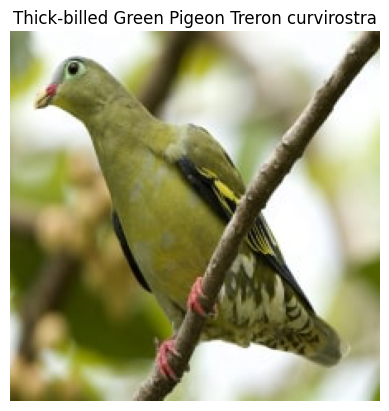

In [24]:
# pred_dicto ={}
for i in images_path:
    pred_bird = prediction(i, trnsfrm, mdl, classes, device)
    # pred_dicto[i[i.rfind('/') + 1:]] = prediction(i, trnsfrm, mdl, classes, device)
    # Load the image using PIL

    image = Image.open(i)

    # Plot the image using matplotlib
    plt.imshow(image)
    plt.title(pred_bird)
    plt.axis('off')  # Turn off axis labels
    plt.show()
# pred_dicto

In [28]:
from flask import Flask, request, jsonify
from torchvision.transforms import transforms
from PIL import Image
import torch
import numpy as np
import glob
import os

app = Flask(__name__)

# Load the model checkpoint and classes
checkpoint = torch.load('C:\\Users\\Vaska\\Downloads\\checkpoint6.pt')
model = ConvNet(num_classes=38)
model.load_state_dict(checkpoint)
model.eval()

# Define the transformation for test data
trnsfrm = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),  
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Prediction function
def predict_bird(image_path, transform, model, classes, device):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
        predicted_class = classes[predicted.item()]
        return predicted_class

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file part'})
    
    file = request.files['file']
    
    if file.filename == '':
        return jsonify({'error': 'No selected file'})
    
    if file:
        filename = file.filename
        file_path = os.path.join('uploads', filename)
        file.save(file_path)
        predicted_class = predict_bird(file_path, trnsfrm, model, classes, device)
        return jsonify({'predicted_class': predicted_class})

if __name__ == '__main__':
    app.run(debug=True,port=5001)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1